# Step 3 - Climate Analysis and Exploration

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

from sqlalchemy import Column, Float, Integer, String
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

### Choose start date and end date for trip

In [2]:
vac_start = '2018-05-16'
vac_end = '2018-05-20'

### Database connection steps

In [3]:
# Connect to sqlite database using create_engine 

engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and 
# save a reference to those classes called Station and Measurement.

# Declare the base using automap
Base = automap_base()

# Reflect the database tables into classes
Base.prepare(engine, reflect=True)

# Check classes 
print(Base.classes.keys())

# Create a session

session = Session(engine)

# Assign classes to variables, save a reference 

measurement = Base.classes.Measurement
station = Base.classes.Station

['Measurement', 'Station']


In [5]:
# Design a query to retrieve the last 12 months of precipitation data.
    # Select only the date and prcp values.
    
prcp_q = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2017-04-16').\
    order_by(measurement.date).all()

# # Check dates 
# print(prcp_q[0:10])
# prcp_q[-10:]

In [6]:
# Load the query results into a Pandas DataFrame and set the index to the date column.

prcp_df = pd.DataFrame(prcp_q,columns=['date', 'prcp'])
prcp_df['date'] = pd.to_datetime(prcp_df['date'])
# prcp_df['date'].dtype
prcp_df = prcp_df.set_index('date')
prcp_df.head()

,prcp
date,
2017-04-17,0.02
2017-04-17,0.41
2017-04-17,0.30
2017-04-17,1.04
2017-04-17,1.30


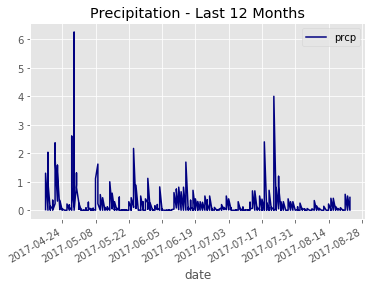

In [7]:
# Plot the results using the DataFrame plot method.

prcp_df.plot(title="Precipitation - Last 12 Months",\
             color="navy", grid=True)

plt.show()

In [8]:
prcp_df.describe()

,prcp
count,674.00000
mean,0.17132
std,0.43323
min,0.00000
25%,0.00000
50%,0.02000
75%,0.14000
max,6.25000


## Station Analysis 

In [9]:
# Design a query to calculate the total number of stations.

n_station = session.query(station.station).count()
print(n_station)

9


In [10]:
# Design a query to find the most active stations.
    # List the stations and observation counts in descending order
    # Which station has the highest number of observations?

station_ct = session.query(func.count(measurement.station),\
            measurement.station).group_by(measurement.station).\
            order_by(desc(func.count(measurement.station)))
for x in station_ct:
    print(x)

(2772, 'USC00519281')
(2696, 'USC00513117')
(2685, 'USC00519397')
(2572, 'USC00519523')
(2484, 'USC00516128')
(1937, 'USC00514830')
(1932, 'USC00511918')
(683, 'USC00517948')
(342, 'USC00518838')


### Station USC00519281 has highest n of observations

In [11]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).

tobs = session.query(measurement.date, measurement.tobs).\
            filter(measurement.date > '2017-04-14').all()
# tobs

In [12]:
# Filter by the station with the highest number of observations.

tobs_bystation = session.query(measurement.station, measurement.date, measurement.tobs).\
            filter(measurement.station == 'USC00519281').\
            filter(measurement.date > '2017-04-14').all()
# tobs_bystation

In [13]:
tobs_df = pd.DataFrame(tobs_bystation)

print(tobs_df['tobs'].max())
print(tobs_df['tobs'].min())

tobs_df.head()

83
60


,station,date,tobs
0,USC00519281,2017-04-15,78
1,USC00519281,2017-04-16,71
2,USC00519281,2017-04-17,67
3,USC00519281,2017-04-18,68
4,USC00519281,2017-04-19,67


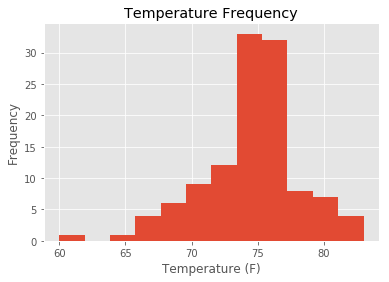

In [14]:
# Plot the results as a histogram with bins=12

plt.hist(tobs_df['tobs'], bins=12)
plt.title('Temperature Frequency')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

## Temperature Analaysis

In [15]:
# Write a function called calc_temps that will accept a start date and end date (%Y-%m-%d) 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps():
    start_date = str(input("Enter start date (%Y-%m-%d): "))
    end_date = str(input("Enter end date (%Y-%m-%d): "))
    
    temp_min = session.query(func.min(measurement.tobs)).\
            filter(measurement.date > start_date).\
            filter(measurement.date < end_date).all()
            
    temp_max = session.query(func.max(measurement.tobs)).\
            filter(measurement.date > start_date).\
            filter(measurement.date < end_date).all()
            
    temp_avg = session.query(func.avg(measurement.tobs)).\
            filter(measurement.date > start_date).\
            filter(measurement.date < end_date).all()
    print(temp_min)
    print(temp_max)
    print(temp_avg)

calc_temps()

# vac_start = '2017-05-16'
# vac_end = '2017-05-20'

# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip 
# using the matching dates from the previous year 
# (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

[(68,)]
[(79,)]
[(73.5,)]


#### Enter start date (%Y-%m-%d): 2017-05-16
#### Enter end date (%Y-%m-%d): 2017-05-20
#### [(68,)] - min 
#### [(79,)] - max 
#### [(73.5,)] - avg

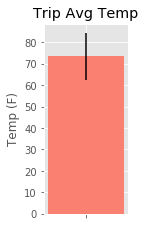

In [16]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
#     Use the average temperature as the bar height.
#     Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
t_min = 68
t_max = 79
t_avg = 73.5
plt.figure(figsize=(1.5,3.5))
plt.bar("",t_avg, yerr=(t_max-t_min), color='salmon')
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.show()